# Seaborn:

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

### [For more..  Set_theme()](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)

# relplot
The **`relplot`** is a powerful tool for visualizing statistical relationships using two common approaches: **scatter plots** and **line plots**. Let's dive into the details:

1. **Scatter Plots**:
   - The default behavior of `relplot` is to create scatter plots. These plots show the relationship between two variables by placing data points on a Cartesian plane.
   - Scatter plots are useful for understanding the distribution of data points and identifying patterns or trends.

2. **Line Plots**:
   - If you prefer line plots, you can set the `kind` parameter to `"line"` when calling `relplot`.
   - Line plots connect data points with lines, making them suitable for visualizing trends over continuous variables (such as time series data).
   - Similar to scatter plots, you can still use additional parameters like **hue**, **size**, and **style** to enhance the line plot.

# Parameters

1. **`col`**: This parameter is used to create **facet grids**. It allows you to create separate subplots for different levels of a categorical variable. For example, if you have a dataset with a "time" column and you set `col="time"`, Seaborn will create separate subplots for each unique value of "time."

2. **`hue`**: The `hue` parameter is used to **color-code** data points based on a categorical variable. When you set `hue="smoker"`, Seaborn will assign different colors to data points based on whether they belong to the "smoker" category or not. This is useful for visualizing relationships between two numeric variables while considering a third categorical variable.

3. **`style`**: The `style` parameter is used to control the **marker style** (e.g., dots, lines, etc.) for scatter plots. When you set `style="smoker"`, Seaborn will use different marker styles for data points based on whether they are smokers or non-smokers.

4. **`size`**: The `size` parameter controls the **size of markers** in scatter plots. By setting `size="size"`, Seaborn will adjust the size of markers based on the values in the "size" column of your dataset.

# [`Must Refer` 14 Different Plotting techniques in Seaborn](https://towardsdatascience.com/14-data-visualization-plots-of-seaborn-14a7bdd16cd7)

In [7]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Load an example dataset
tips = sns.load_dataset("tips")

In [8]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
tips["time"].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

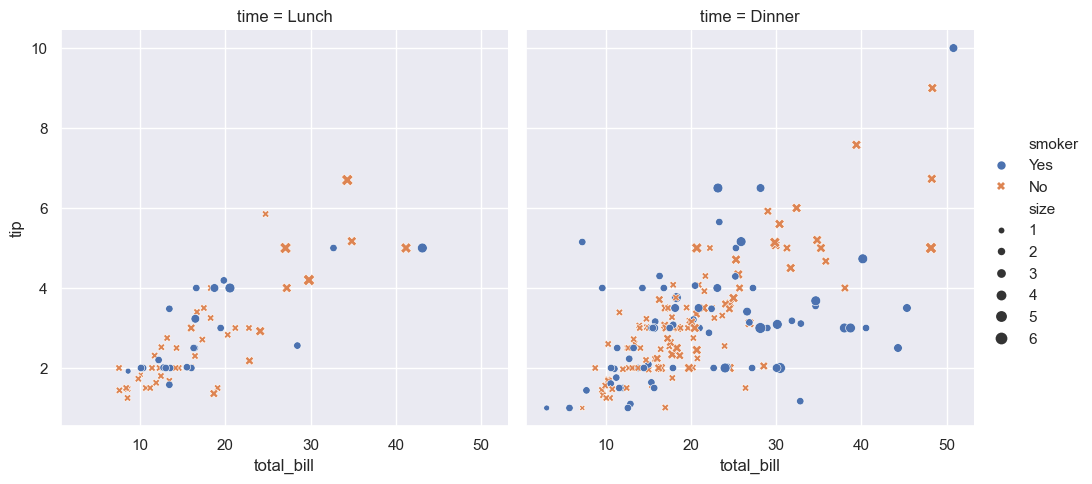

In [14]:
# Create a visualization
sns.relplot(
    data=tips,
    x="total_bill", y="tip", col="time",
    hue="smoker", style="smoker", size="size",
)

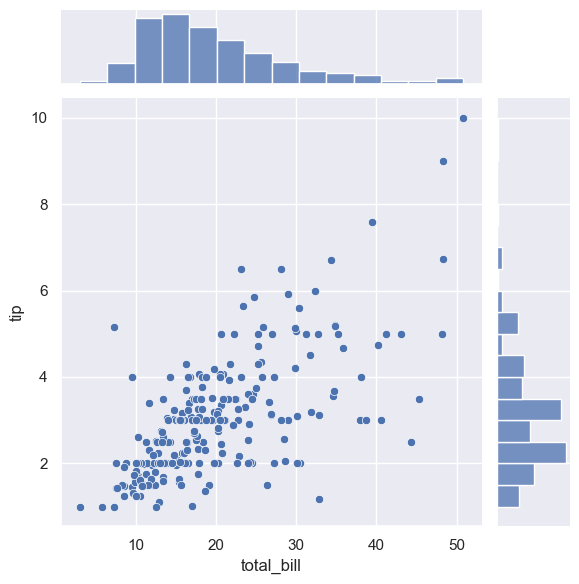

In [26]:
sns.jointplot(
    data=tips,
    x="total_bill", y="tip") # kind = 'scatter' is default

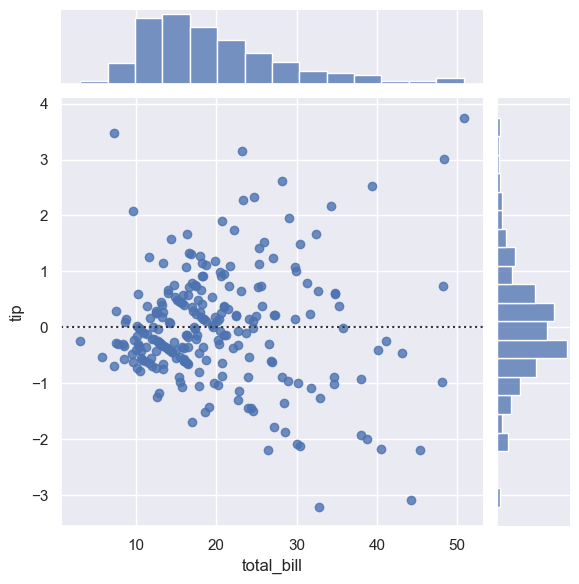

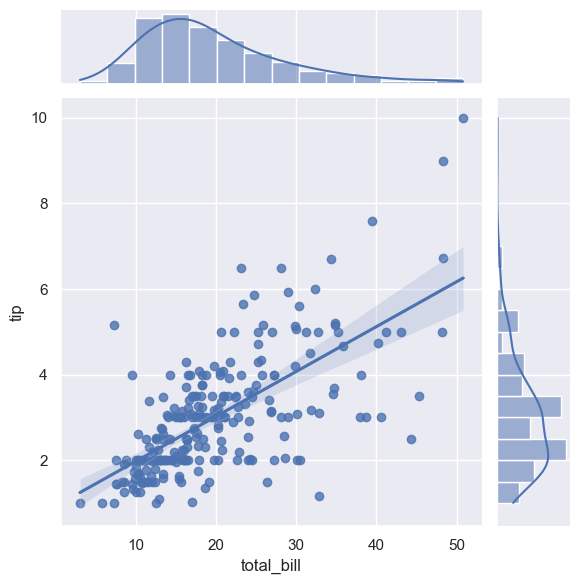

In [31]:
sns.jointplot(
    data=tips,
    x="total_bill", y="tip", kind = 'resid' ) #Residual Plot
""" kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }"""

"""

1. A residual plot helps assess the fit of a regression model.

2. It displays the difference between the observed values (actual data points) and the predicted values (values estimated by the regression model).

3. For each data point, calculate the residual as the vertical distance between the observed value and the corresponding predicted value.

4. If the residuals are randomly scattered around zero, the regression model is a good fit.

5. If there’s a clear pattern (e.g., residuals increasing or decreasing systematically), the model may not be appropriate.

"""
sns.jointplot(
    data=tips,
    x="total_bill", y="tip", kind = 'reg' ) 

<Axes: xlabel='tip'>

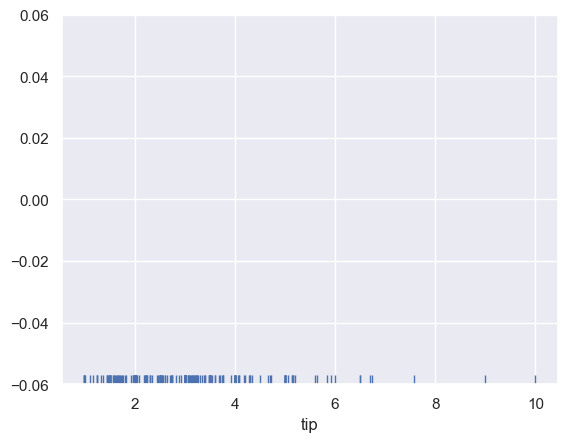

In [33]:
sns.rugplot(x = tips['tip'])

# Categorical VS Continuous

<Axes: xlabel='time', ylabel='tip'>

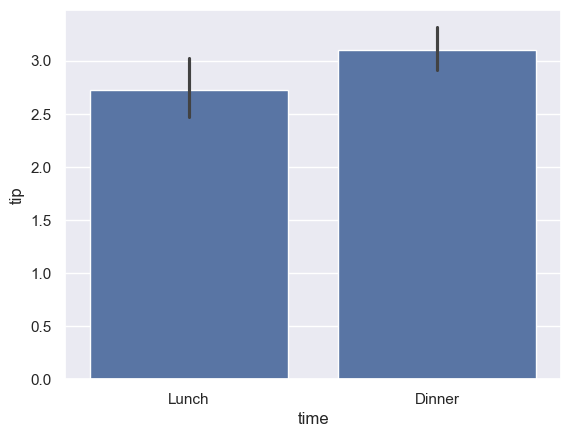

In [35]:
sns.barplot(data = tips, x = 'time', y = 'tip')

<Axes: xlabel='day', ylabel='count'>

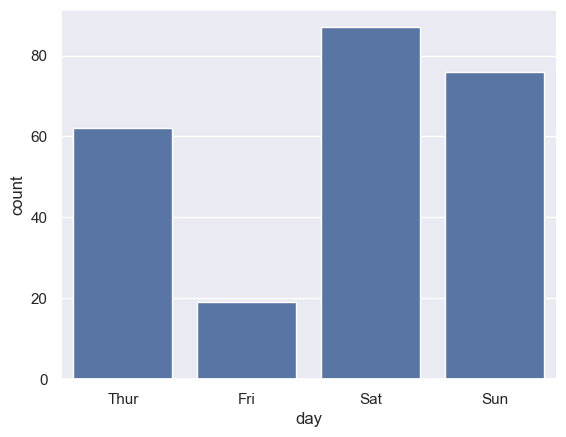

In [36]:
sns.countplot(data = tips, x = "day")

## Box Plot
- It is a 5 point summary plot. It gives the information about the maximum, minimum, mean, first quartile, and third quartile of a continuous variable. Also, it equips us with knowledge of outliers.
- We can plot this for a single continuous variable or can analyze different categorical variables based on a continuous variable.

<Axes: xlabel='tip'>

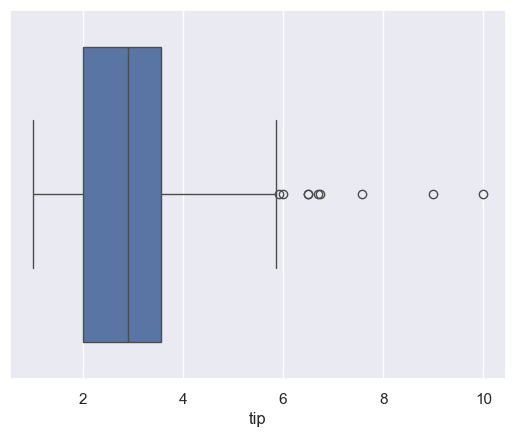

In [39]:
sns.boxplot(tips['tip'], orient = "h") #orient : "v" | "h" | "x" | "y"

<Axes: xlabel='size', ylabel='tip'>

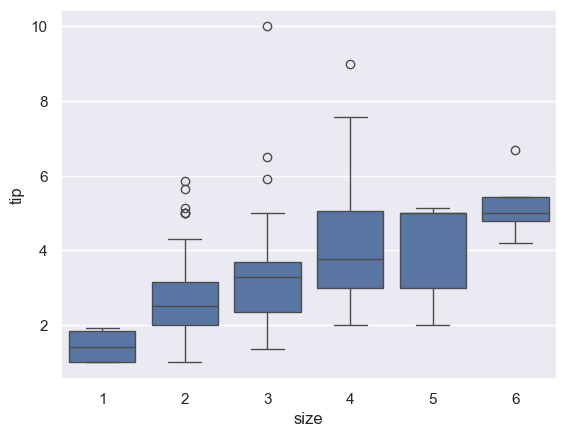

In [43]:
sns.boxplot(data = tips, y = 'tip' , x = "size") #to check how continuous each category is?

# Violin:
similar to boxplot + dist info

<Axes: xlabel='tip', ylabel='sex'>

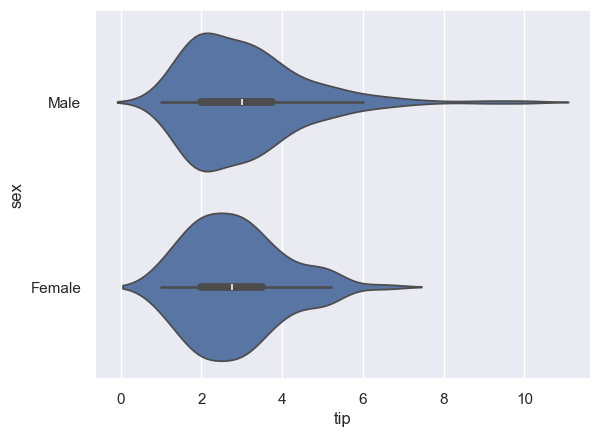

In [46]:
sns.violinplot(data = tips, x = "tip", y = "sex")

<Axes: xlabel='size', ylabel='tip'>

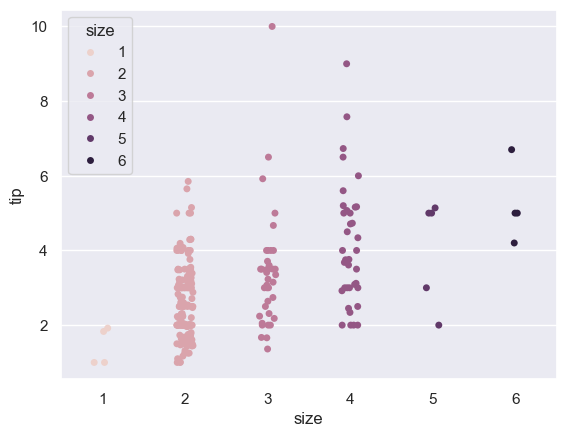

In [58]:
sns.stripplot(y = tips['tip'], x = tips['size'], hue = tips["size"]) #to impute missing values.

### Swarm Plot (strip plot + violin plot.)

<Axes: xlabel='time', ylabel='total_bill'>

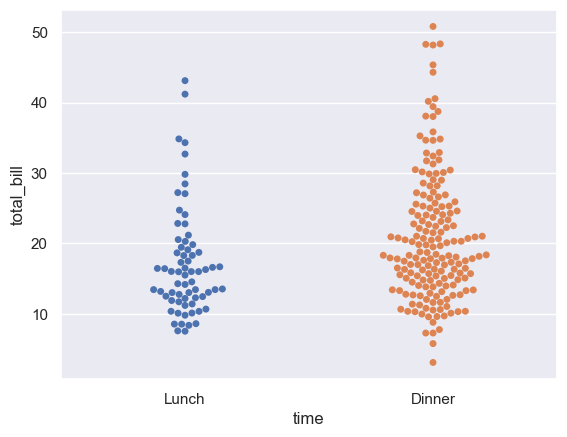

In [57]:
sns.swarmplot(data = tips, x = "time", y = "total_bill", hue = "time")

<Axes: >

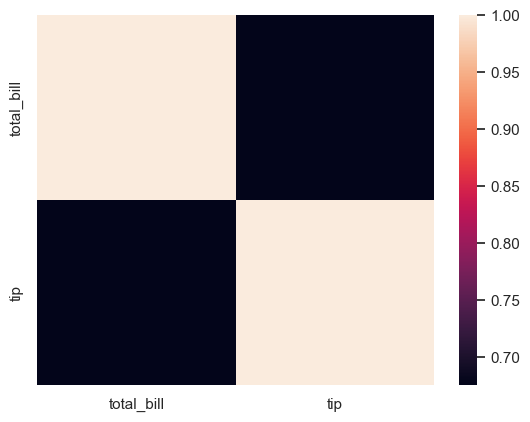

In [64]:
sns.heatmap(tips[["total_bill","tip"]].corr())

### Identifying missing values using heatmap

<Axes: >

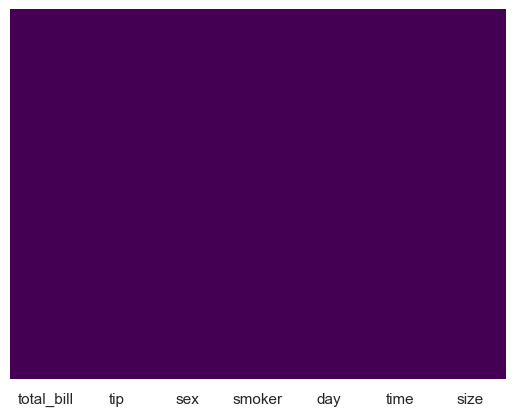

In [65]:
sns.heatmap(tips.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [71]:
tips[tips.isnull()].count()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### Regression Plot (scatter plot + linear fitting on data)

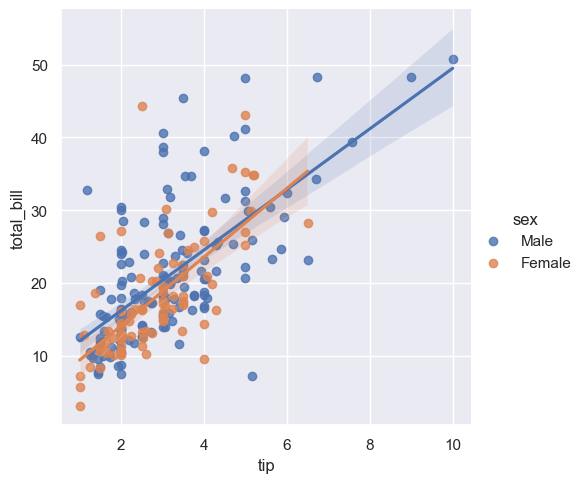

In [73]:
sns.lmplot(data = tips, x = "tip", y = "total_bill", hue = "sex")

C:\Users\ELCOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ELCOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\ELCOT\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your

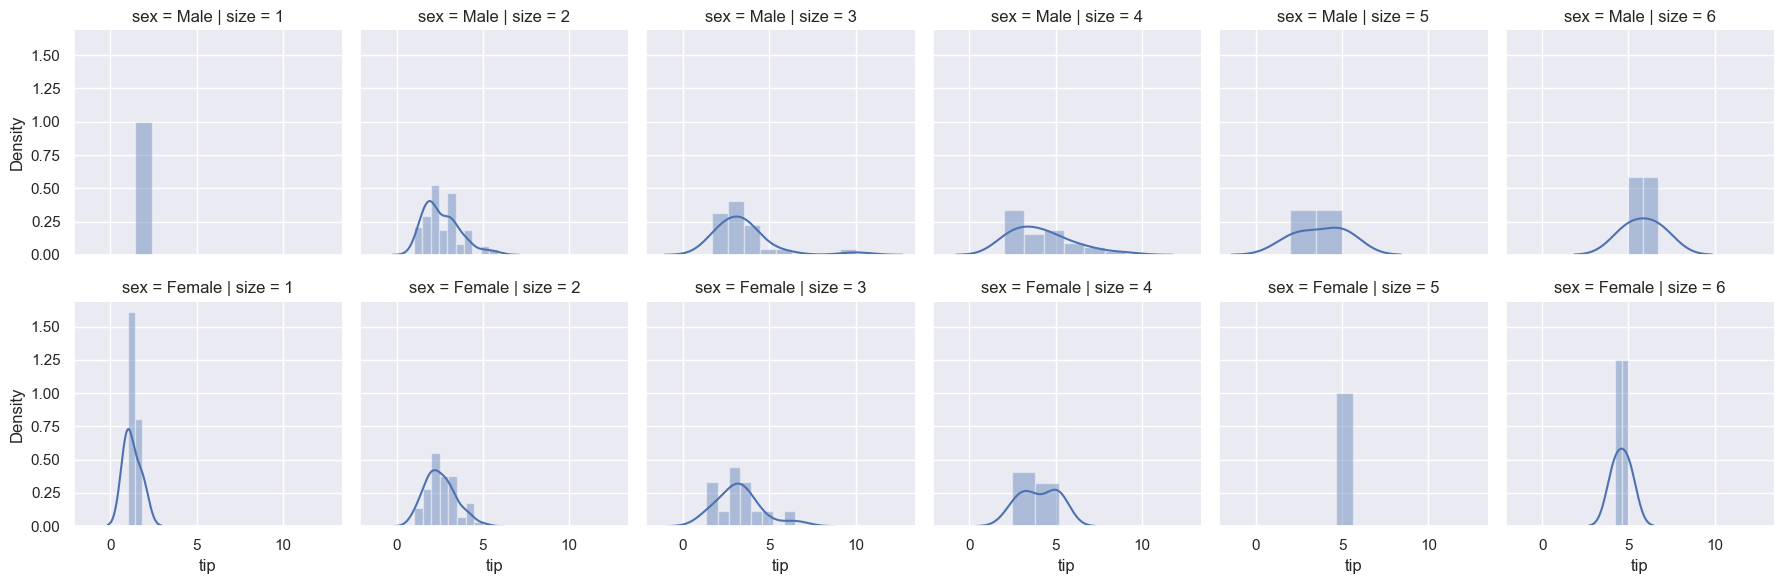

In [75]:
sns.FacetGrid(tips, col = 'size', row = 'sex').map(sns.distplot, 'tip')